# Predicting total runs by the end of 6 overs

Problem statement: Given certain input parameters regarding an innings of a T20 cricket match, predict the total runs scored by the batting team at the end of 6 overs.

In [1]:
#Import needed packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Read the dataset given
df = pd.read_csv('data/all_matches.csv')

C:\Users\SHEKINAH\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Display the first five rows of the dataset
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Duplicating the dataset to perform some calculations
total_df = df
total_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Retaining only the first 6 overs data in every match and innings less than 3
total_df = total_df[total_df['ball']<=5.6]
total_df = total_df[total_df['innings']<=2]

In [6]:
#Calaculating the total runs by adding the runs scored from bat and extras
total = total_df['runs_off_bat'] + total_df['extras']
total_df['total'] = total

In [7]:
total_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
#Displaying the unique teams in the dataset
total_df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [9]:
#Retaining only the consistent teams over the years
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [10]:
total_df = total_df[(total_df['batting_team'].isin(consistent_teams)) & (total_df['bowling_team'].isin(consistent_teams))]

In [11]:
#Removing the columns which won't do any good
columns_to_remove = ['season', 'wides', 'noballs', 'byes', 'legbyes', 'penalty', 'wicket_type', 'other_wicket_type', 'player_dismissed', 'other_player_dismissed', 'runs_off_bat', 'extras']
total_df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [12]:
total_df.head()

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,total
0,335982,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,1
1,335982,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0
2,335982,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,1
3,335982,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0
4,335982,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0


In [13]:
#Calculating the total runs scored in the first 6 overs by each batting team
total_df = total_df.groupby(['match_id', 'venue', 'innings', 'batting_team', 'bowling_team']).total.sum()

In [14]:
#Converting Series to data frame
total_df = total_df.to_frame()

In [15]:
total_df.head()

total
match_id venue                                      innings batting_team                bowling_team                      
335982   M Chinnaswamy Stadium                      1       Kolkata Knight Riders       Royal Challengers Bangalore     61
                                                    2       Royal Challengers Bangalore Kolkata Knight Riders           26
335983   Punjab Cricket Association Stadium, Mohali 1       Chennai Super Kings         Kings XI Punjab                 53
                                                    2       Kings XI Punjab             Chennai Super Kings             56
335984   Feroz Shah Kotla                           1       Rajasthan Royals            Delhi Daredevils                40

In [16]:
# Retaining only the first 6 overs data in every match and innings less than 3
df = df[df['ball']<=5.6]
df = df[df['innings']<=2]

In [17]:
#Retaining only the consistent teams over the years
df = df[(df['batting_team'].isin(consistent_teams)) & (df['bowling_team'].isin(consistent_teams))]

In [18]:
#Removing the columns which won't do any good
columns_to_remove = ['season', 'wides', 'noballs', 'byes', 'legbyes', 'penalty', 'wicket_type', 'other_wicket_type', 'player_dismissed', 'other_player_dismissed', 'runs_off_bat', 'extras']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [19]:
df.head()

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler
0,335982,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar
1,335982,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar
2,335982,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar
3,335982,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar
4,335982,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar


In [20]:
#Merging both the data frames
merged_df = pd.merge(df, total_df, on=['match_id','batting_team','bowling_team'])

In [21]:
merged_df.head()

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,total
0,335982,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,61
1,335982,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,61
2,335982,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,61
3,335982,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,61
4,335982,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,61


In [22]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
merged_df['start_date'] = merged_df['start_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [23]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=merged_df, columns=['venue', 'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler'])

In [24]:
encoded_df.head()

,match_id,start_date,innings,ball,total,venue_Arun Jaitley Stadium,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,venue_De Beers Diamond Oval,...,bowler_VS Yeligati,bowler_VY Mahesh,bowler_WD Parnell,bowler_Washington Sundar,bowler_Y Prithvi Raj,bowler_Y Venugopal Rao,bowler_YA Abdulla,bowler_YK Pathan,bowler_YS Chahal,bowler_Z Khan
0,335982,2008-04-18,1,0.1,61,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,335982,2008-04-18,1,0.2,61,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,335982,2008-04-18,1,0.3,61,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,335982,2008-04-18,1,0.4,61,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,335982,2008-04-18,1,0.5,61,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
encoded_df.drop(labels='start_date', axis=True, inplace=True)

In [26]:
encoded_df.drop(labels='match_id', axis=True, inplace=True)

In [27]:
encoded_df.head()

,innings,ball,total,venue_Arun Jaitley Stadium,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,venue_De Beers Diamond Oval,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,...,bowler_VS Yeligati,bowler_VY Mahesh,bowler_WD Parnell,bowler_Washington Sundar,bowler_Y Prithvi Raj,bowler_Y Venugopal Rao,bowler_YA Abdulla,bowler_YK Pathan,bowler_YS Chahal,bowler_Z Khan
0,1,0.1,61,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.2,61,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.3,61,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.4,61,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.5,61,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Splitting the data into train and test set
X = encoded_df.drop(labels='total', axis=1)

In [29]:
y = encoded_df['total'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
#Performing feature engineering
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
# --- Model Building ---
# Random Forest Regression
lin = RandomForestRegressor(n_estimators=100,max_features=None)
lin.fit(X_train,y_train)

RandomForestRegressor(max_features=None)

In [33]:
#Defining custom accuracy
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [34]:
#Displaying the metrics of the model
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R-squared value: 97.38810131980132
Custom accuracy: 99.90130988695496


In [35]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [36]:
#Displaying the metrics of the model
y_pred = regressor.predict(X_test)
score = regressor.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R-squared value: -1.5997909240434097e+23
Custom accuracy: 94.9129732639512


In [38]:
# --- Model Building ---
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [39]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\SHEKINAH\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.84223e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\SHEKINAH\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.0626e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\SHEKINAH\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.27776e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\SHEKINAH\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.01181e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\SHEKINAH\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.03078e-17): result may n

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [40]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-10}
-102.88492281073918


In [41]:
prediction=ridge_regressor.predict(X_test)

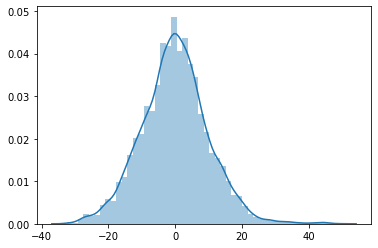

In [42]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [43]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.737453390060514
MSE: 100.83268658428261
RMSE: 10.04154801732694


In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, prediction)

In [45]:
r2

0.27551160966669597

In [46]:
##Lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [47]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\SHEKINAH\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304562.95776628377, tolerance: 379.19063
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHEKINAH\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246941.3922959161, tolerance: 384.02847476635515
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHEKINAH\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238547.64841597714, tolerance: 383.8533008747664
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHEKINAH\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergenc

{'alpha': 0.01}
-102.84320208160891


In [48]:
lasso_prediction=lasso_regressor.predict(X_test)

In [49]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, lasso_prediction)
r2

0.2758835750935982